In [9]:
import csv
import random
import math
import matplotlib.pyplot as plt  # Untuk visualisasi


# Load Dataset tanpa Pandas

In [10]:
# Fungsi untuk membaca data dari file CSV
def load_data(filepath):
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Lewati baris header
        data = []
        for row in reader:
            try:
                income = float(row[3])        # Annual Income (kolom ke-4)
                score = float(row[4])         # Spending Score (kolom ke-5)
                data.append([income, score])  # Ambil 2 fitur saja
            except ValueError:
                continue  # Skip baris yang error/berisi data kosong
        return data

# Load data awal
data = load_data('Mall_Customers.csv')
print(f"Total data yang berhasil dibaca: {len(data)} baris")

Total data yang berhasil dibaca: 200 baris


# Jarak Euclidean & Inisialisasi Centroid

In [11]:
def euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def init_centroids(data, k):
    return random.sample(data, k)

# K-Means Clustering

In [12]:
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        min_index = distances.index(min(distances))
        clusters[min_index].append(point)
    return clusters

def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if len(cluster) == 0:
            new_centroids.append([0, 0])  # Tangani cluster kosong
        else:
            x_mean = sum(p[0] for p in cluster) / len(cluster)
            y_mean = sum(p[1] for p in cluster) / len(cluster)
            new_centroids.append([x_mean, y_mean])
    return new_centroids

def is_converged(old, new):
    return all(euclidean(o, n) < 1e-4 for o, n in zip(old, new))

def kmeans(data, k, max_iter=100):
    centroids = init_centroids(data, k)
    for _ in range(max_iter):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if is_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids


# Evaluasi K dengan Elbow Method

In [13]:
def calculate_sse(clusters, centroids):
    sse = 0
    for i in range(len(clusters)):
        for point in clusters[i]:
            sse += euclidean(point, centroids[i]) ** 2
    return sse

def run_elbow_method(data, max_k=6):
    sse_values = []
    for k in range(1, max_k + 1):
        clusters, centroids = kmeans(data, k)
        sse = calculate_sse(clusters, centroids)
        sse_values.append(sse)
        print(f"k = {k}, SSE = {sse:.2f}")
    
    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k + 1), sse_values, marker='o', color='blue')
    plt.title('Elbow Method - SSE vs K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('SSE')
    plt.grid(True)
    plt.show()


# Visualisasi dan Simpan Hasil

In [ ]:

def visualize_clusters(clusters, centroids):
    colors = ['red', 'green', 'blue']
    plt.figure(figsize=(8,6))
    for i, cluster in enumerate(clusters):
        x_vals = [p[0] for p in cluster]
        y_vals = [p[1] for p in cluster]
        plt.scatter(x_vals, y_vals, color=colors[i % len(colors)], label=f'Cluster {i+1}')
    
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=200, edgecolors='white')
    
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title("Visualisasi Hasil Clustering")
    plt.legend()
    plt.grid(True)
    plt.show()

def save_to_csv(clusters, output_file):
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Annual Income', 'Spending Score', 'Cluster'])
        for idx, cluster in enumerate(clusters):
            for point in cluster:
                writer.writerow([point[0], point[1], idx + 1])


# Eksekusi Program

k = 1, SSE = 269981.28
k = 2, SSE = 181363.60
k = 3, SSE = 106348.37
k = 4, SSE = 73679.79
k = 5, SSE = 44454.48
k = 6, SSE = 37265.87


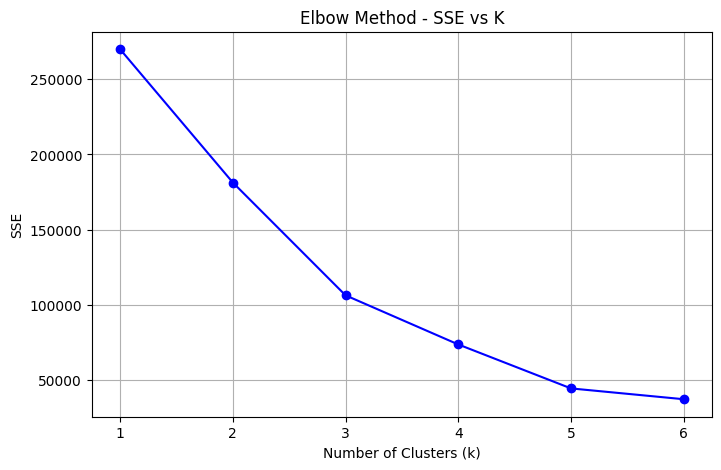


✅ Hasil clustering disimpan ke: Clustered_Mall_Customers.csv


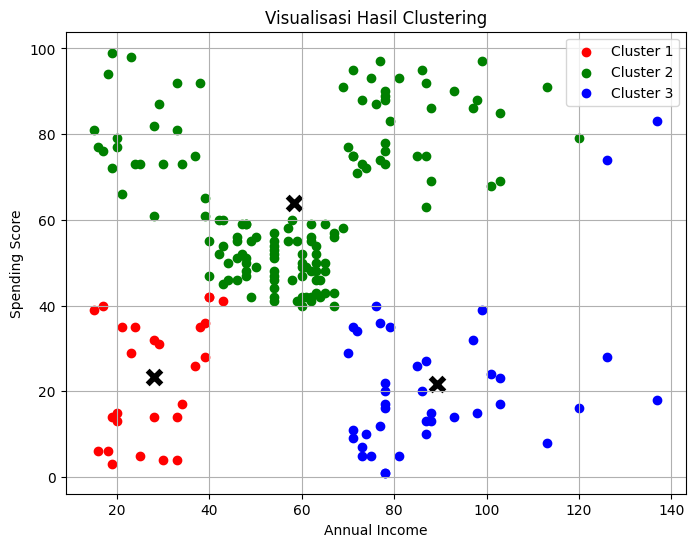

In [ ]:
# 1. Jalankan Elbow Method
run_elbow_method(data, max_k=6)

# 2. Pilih k berdasarkan elbow (misal k = 3)
k = 3
clusters, centroids = kmeans(data, k)

# 3. Simpan hasil ke file CSV
save_to_csv(clusters, 'Clustered_Mall_Customers.csv')
print("\n✅ Hasil clustering disimpan ke: Clustered_Mall_Customers.csv")

# 4. Visualisasi
visualize_clusters(clusters, centroids)
